In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Reading Data
df=pd.read_csv('kc_house_data.csv.zip')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Collecting X and Y values
X=df['sqft_living15'].values
Y=df['price'].values

In [7]:
#Mean X and Y 
mean_x=np.mean(X)
mean_y=np.mean(Y)

#Total number of values
m=len(X)

#Using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(m):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)

#print b0 and b1
print(b1,b0)

313.5559415735223 -82807.19520854135


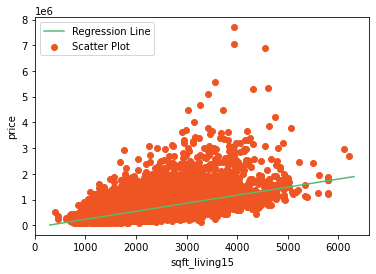

In [9]:
#plotting values and regression line

max_x=np.max(X) +100
min_x=np.min(X) -100

#calculate line values X and Y
x=np.linspace(min_x, max_x, 1000)
y=b0+b1*x

#ploting line
plt.plot(x,y,color="#58b970",label='Regression Line')
#plot the scatter line
plt.scatter(X,Y,color="#ef5423",label='Scatter Plot')

plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.legend()
plt.show()

In [10]:
#R2 Value
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(mean_y-y_pred)**2
r=1-ss_r/ss_t
print(r)

0.6573315392439747


In [11]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error

In [13]:
X=X.reshape((m,1))

reg=LinearRegression()

reg=reg.fit(X,Y)

Y_pred=reg.predict(X)

r2_score=reg.score(X,Y)

print(1-r2_score)

0.6573315392439828
